# Exercise 2: Linear Regression Multi-Variable
> In this exercise, I will implement the Linear Regression with multi-variable and work with Boston House Prices data:
> https://www.kaggle.com/datasets/vikrishnan/boston-house-prices
> * Input(X):
>   - CRIM:     per capita crime rate by town
>   - ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
>   - INDUS:    proportion of non-retail business acres per town
>   - CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
>   - NOX:      nitric oxides concentration (parts per 10 million)
>   - RM:       average number of rooms per dwelling
>   - AGE:      proportion of owner-occupied units built prior to 1940
>   - DIS:      weighted distances to five Boston employment centres
>   - RAD:      index of accessibility to radial highways
>   - TAX:      full-value property-tax rate per $10,000
>   - PTRATIO:  pupil-teacher ratio by town
>   - B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
>   - LSTAT:    % lower status of the population
> * Output(Y):
>   - MEDV:     Median value of owner-occupied homes in $1000's
> * Number of training examples: 506

## Table of contents
* [1. Data Analyst](#C1)
* [2. Gradient Descent](#C2)
    * [2.1. Feature Normalization](#C2_1)
    * [2.2 Selecting Learning Rates](#C2_2)
* [3. Normal Equations](#C3)
* [4. Equivalent Code using Scikit-Learn](#C4)
* [5. Conclusion](#C5)

## 1. Data Analyst <a id='C1'></a>
This chapter show the Boston House Prices data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv', sep="\s+|\t+|\s+\t+|\t+\s+", on_bad_lines='skip', header=None)
df.columns = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
pd.DataFrame(df)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12872\725577841.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('housing.csv', sep="\s+|\t+|\s+\t+|\t+\s+", on_bad_lines='skip', header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12872\3171763591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], rug=True)


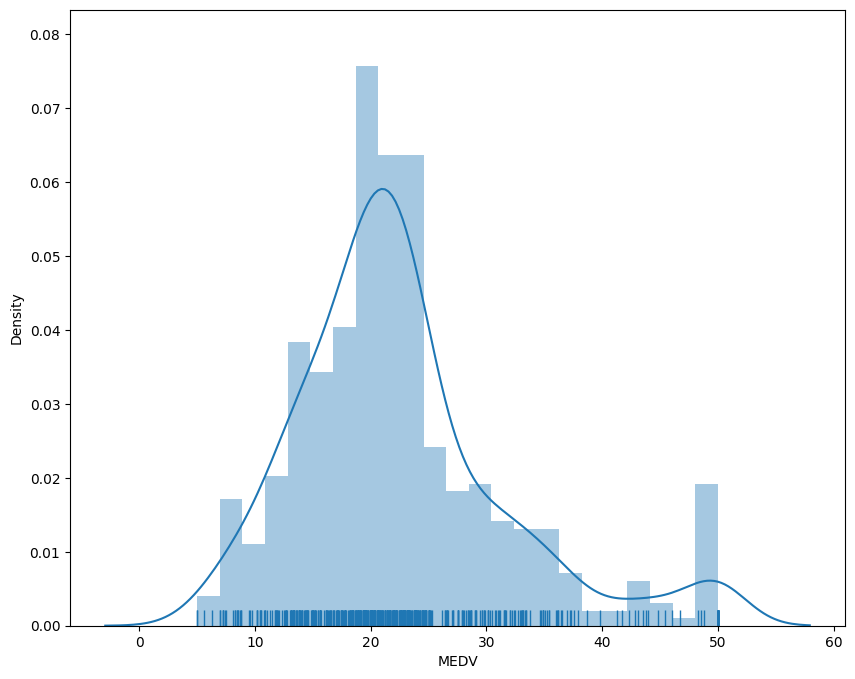

In [5]:
plt.figure(figsize=(10, 8))
sns.distplot(df['MEDV'], rug=True)
plt.show()

The above graph is a combination of histogram, kernel density estimate, and plot of every single data point. From the graph, we can see that the distribution of the target variable is pretty close to a normal distribution with a few outliers to the right.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12872\832031770.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


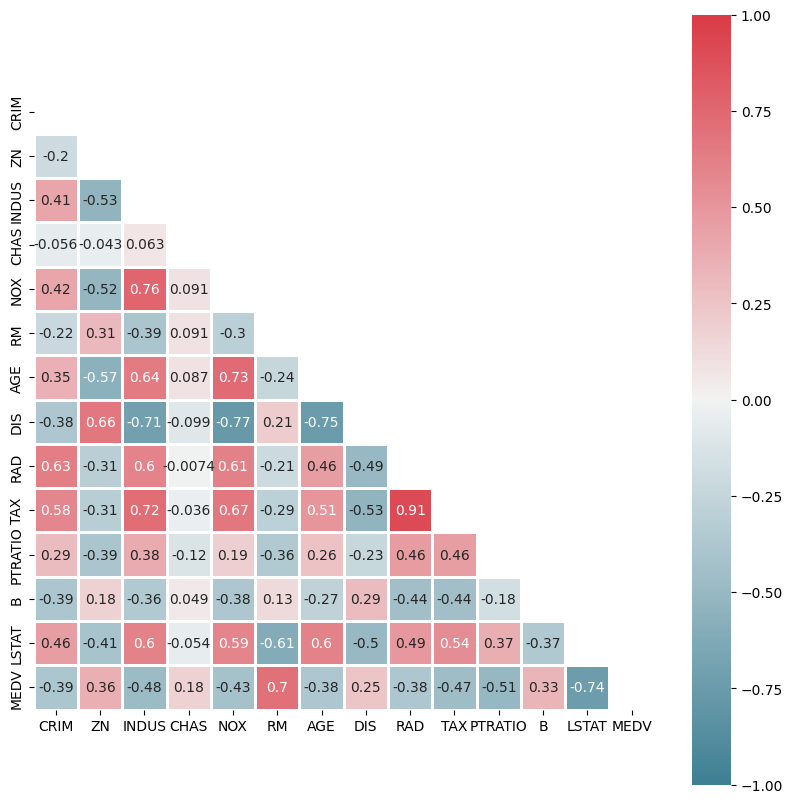

In [6]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, square=True, mask=mask, cmap=cmap, linewidths=2)
plt.show()

From the graph above, we can see that there is quite amount of strong and close to strong correlations happening among feature variables, especially between TAX (full-value property-tax rate per $10,000) and RAD (index of accessibility to radial highways). This causes problems when fitting linear models since linear models have assumed no or little multicollinearity.

## 2. Gradient Descent <a id='C2'></a>
In the multivariate case, the cost function can also be written in the following vectorized form:
$$J(\theta) = \frac{1}{2m}(X\theta - y)^{T} (X\theta - y)$$

In [7]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

### 2.1. Feature Normalization <a id='C2_1'></a>

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


"CHAS","B" isn't corr to MEDV

In [10]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [11]:
X_norm, mu, sigma = feature_normalize(df[['CRIM', 'ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']])

### 2.2. Selecting Learning Rates <a id='C2_2'></a>
- Make a plot with number of iterations on the x-axis. Now plot the cost function, $J(\theta)$ over the number of iterations of gradient descent. If $J(\theta)$ ever increases, then you probably need to decrease $\alpha$.
- Declare convergence if $J(\theta)$ decreases by less than E in one iteration, where E is some small value such as $10^{-3}$.

In [12]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(df.MEDV.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (404, 13)
Shape of X_test = (102, 13)
Shape of y_train = (404, 1)
Shape of y_test = (102, 1)


In [14]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 100

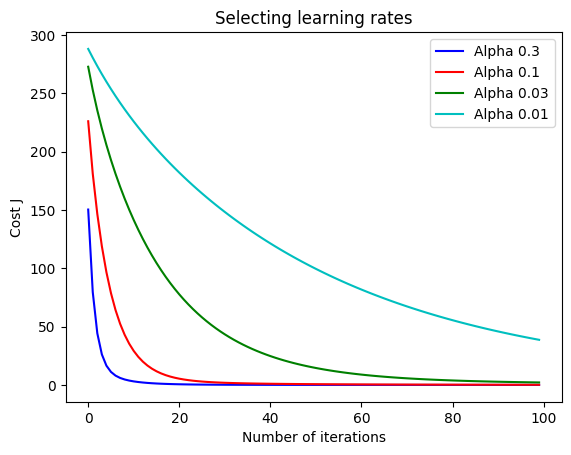

In [15]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

Choose $\alpha = 0.3$

In [16]:
iterations = 100
alpha = 0.3
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[ 2.25328063e+01]
 [-1.71864115e-02]
 [ 2.66900362e-02]
 [ 3.90096417e-02]
 [-4.57088050e-02]
 [ 3.38517219e-04]
 [ 1.08175888e-02]
 [-4.09704427e-02]
 [ 1.20812185e-01]
 [-1.20385803e-01]
 [-2.04748425e-02]
 [-3.27279412e-02]
 [ 9.14403274e+00]]


In [17]:
def Predict(X,theta):
    """
    This function predicts the result for the unseen data
    """
    y_pred = X.dot(theta)
    return y_pred

In [18]:
y_pred1 = Predict(X_test,theta)
y_pred1[:20]

array([[23.64474347],
       [32.46264123],
       [13.43386288],
       [22.81642432],
       [16.11373119],
       [20.00696111],
       [17.79152395],
       [13.95248559],
       [19.67251802],
       [16.78438964],
       [21.57125347],
       [18.89151906],
       [ 6.91867512],
       [21.17169931],
       [18.52063561],
       [29.7881486 ],
       [18.95667116],
       [10.19087129],
       [49.98471615],
       [14.11753282]])

In [19]:
y_test[:20]

array([[23.6],
       [32.4],
       [13.6],
       [22.8],
       [16.1],
       [20. ],
       [17.8],
       [14. ],
       [19.6],
       [16.8],
       [21.5],
       [18.9],
       [ 7. ],
       [21.2],
       [18.5],
       [29.8],
       [18.8],
       [10.2],
       [50. ],
       [14.1]])

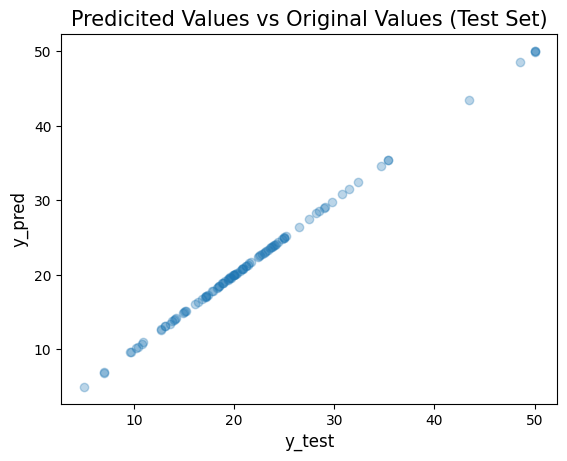

In [20]:
plt.scatter(x=y_test,y=y_pred1,alpha=0.3)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

## 3. Normal Equations <a id='C3'></a>
A closed-form solution to find $\theta$ without iteration.
$$\theta = (X^{T} X)^{-1} X^T y$$

In [21]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [22]:
Xe = np.hstack((np.ones((m,1)),df[['CRIM', 'ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']].values))
theta_e = normal_eqn(Xe, y)
theta_e

array([[-1.22009958e-09],
       [ 6.35259640e-13],
       [-1.02737263e-13],
       [-4.84051601e-13],
       [ 4.33321601e-10],
       [ 5.59045865e-11],
       [-1.12352402e-13],
       [ 2.08145445e-11],
       [-5.76785147e-12],
       [ 1.52610780e-13],
       [ 2.17583035e-11],
       [ 5.39578104e-12],
       [ 1.00000000e+00]])

In [23]:
y_pred2 = Predict(X_test,theta_e)
y_pred2[:20]

array([[ 0.11603584],
       [ 1.07285876],
       [-0.97126294],
       [ 0.02905193],
       [-0.69943824],
       [-0.27539172],
       [-0.51459745],
       [-0.92777099],
       [-0.31888367],
       [-0.62332733],
       [-0.11229691],
       [-0.39499459],
       [-1.68888013],
       [-0.14491587],
       [-0.43848654],
       [ 0.79016108],
       [-0.40586758],
       [-1.34094452],
       [ 2.9865046 ],
       [-0.916898  ]])

## 4. Equivalent Code using Scikit-Learn <a id='C4'></a>

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_norm, y)

LinearRegression()

In [25]:
lin_reg.intercept_, lin_reg.coef_

(array([22.53280632]),
 array([[-5.25901723e-15, -3.10862447e-15, -1.44328993e-15,
          2.55351296e-15, -6.66133815e-16,  7.77156117e-16,
          1.11022302e-15, -6.43929354e-15, -4.10782519e-15,
         -1.94289029e-15,  2.55351296e-15,  9.19710409e+00]]))

In [26]:
thetas = np.append([lin_reg.intercept_],lin_reg.coef_)
thetas = np.reshape(thetas,(1,13))
thetas.T

array([[ 2.25328063e+01],
       [-5.25901723e-15],
       [-3.10862447e-15],
       [-1.44328993e-15],
       [ 2.55351296e-15],
       [-6.66133815e-16],
       [ 7.77156117e-16],
       [ 1.11022302e-15],
       [-6.43929354e-15],
       [-4.10782519e-15],
       [-1.94289029e-15],
       [ 2.55351296e-15],
       [ 9.19710409e+00]])

In [27]:
y_pred3 = Predict(X_test,thetas.T)
y_pred3[:20]

array([[23.6],
       [32.4],
       [13.6],
       [22.8],
       [16.1],
       [20. ],
       [17.8],
       [14. ],
       [19.6],
       [16.8],
       [21.5],
       [18.9],
       [ 7. ],
       [21.2],
       [18.5],
       [29.8],
       [18.8],
       [10.2],
       [50. ],
       [14.1]])

In [28]:
y_test[:20]

array([[23.6],
       [32.4],
       [13.6],
       [22.8],
       [16.1],
       [20. ],
       [17.8],
       [14. ],
       [19.6],
       [16.8],
       [21.5],
       [18.9],
       [ 7. ],
       [21.2],
       [18.5],
       [29.8],
       [18.8],
       [10.2],
       [50. ],
       [14.1]])

## 5. Conclusion <a id='C5'></a>

> - The result of Gradient Descent Equations is approx the result using sklearn.linear_model library
> - The result of Normal Equations is bad (I do not know if I'm doing it wrong.)

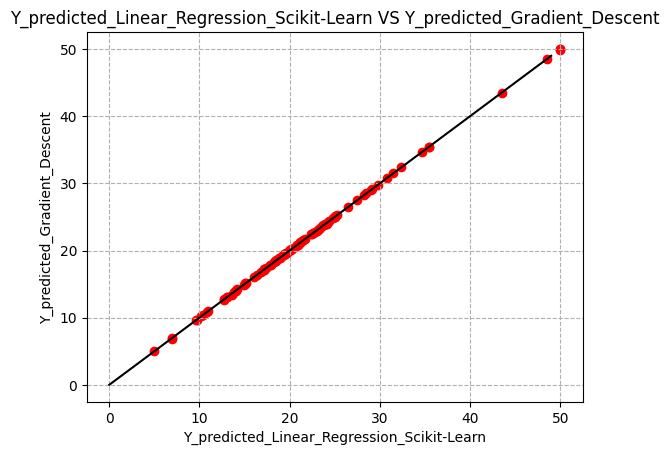

In [29]:
plt.scatter(y_pred3, y_pred1, marker = 'o', color = 'red')
x = np.arange(50)
plt.plot(x, x, color = 'black')
plt.xlabel('Y_predicted_Linear_Regression_Scikit-Learn')
plt.ylabel('Y_predicted_Gradient_Descent')
plt.title('Y_predicted_Linear_Regression_Scikit-Learn VS Y_predicted_Gradient_Descent')
plt.grid(ls = '--')

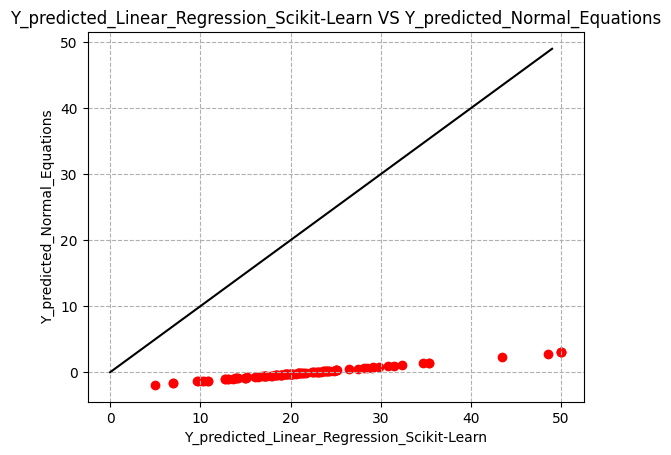

In [30]:
plt.scatter(y_pred3, y_pred2, marker = 'o', color = 'red')
x = np.arange(50)
plt.plot(x, x, color = 'black')
plt.xlabel('Y_predicted_Linear_Regression_Scikit-Learn')
plt.ylabel('Y_predicted_Normal_Equations')
plt.title('Y_predicted_Linear_Regression_Scikit-Learn VS Y_predicted_Normal_Equations')
plt.grid(ls = '--')